In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('icefire')

import warnings
warnings.filterwarnings('ignore')

import pickle

In [2]:
path = '../models/BIST100/log_sq_rtn/1/LSTM/without_commodity_prices'
with open(f'{path}/valid_predictions-1.pkl', 'rb') as f:
    preds = pickle.load(f)
    preds[-1] = preds[-1].flatten()
    df_preds = pd.DataFrame(preds).T
    df_preds.columns = ['date', 'gt', 'prediction']
    [index, _, window, model_config, commodity] = path.split('/')[2:]
    base_model = 'Peephole_LSTM' if model_config.startswith('Peephole_LSTM') else ('GRU' if 'GRU' in model_config else 'LSTM')
    model_config = model_config.replace(f'{base_model}_', '').replace(f'{base_model}', '')
    df_preds[['index', 'window', 'base_model' ,'model_config', 'commodity']] = [index, window, base_model, model_config, commodity]
    df_preds['date'] = pd.to_datetime(df_preds['date'])

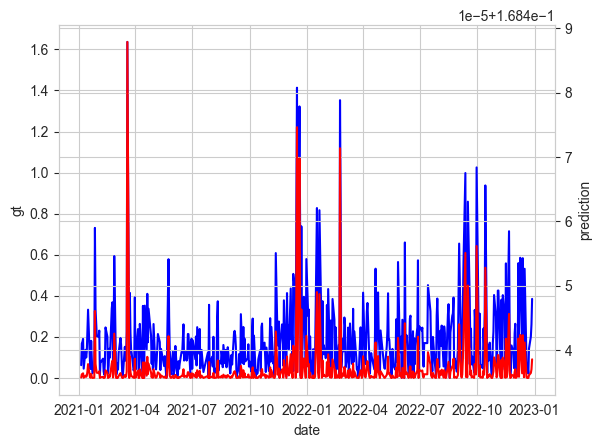

In [3]:
fig, ax = plt.subplots(1, 1)
sns.lineplot(data = df_preds, x = 'date', y = 'gt', color = 'blue', ax = ax)
ax1 = ax.twinx()
sns.lineplot(data = df_preds, x = 'date', y = 'prediction', color = 'red', ax = ax1)
plt.show()

In [4]:
df = pd.read_csv('../inputs/prep_data/window_7/BIST100/final_data.csv', index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
df.head(2)

,log_returns,realized_volatility,garch_volatility,egarch_volatility,gjr_garch_volatility,Date,Price,Open,High,Low,Vol.,Change %
1,0.000024,0.122266,1.251872,1.254782,1.256383,2013-01-03,800.33,797.77,801.66,793.92,689.57M,0.49%
2,0.000034,0.120994,1.224391,1.208992,1.223888,2013-01-04,795.64,797.57,799.60,792.94,545.99M,-0.59%


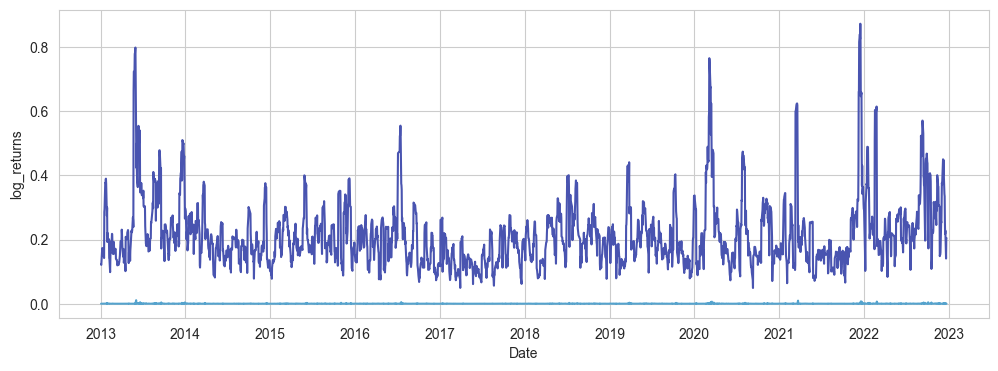

In [5]:
plt.figure(figsize = (12, 4))
sns.lineplot(data = df, x = 'Date', y = 'log_returns', ci = None)
sns.lineplot(data = df, x = 'Date', y = 'realized_volatility', ci = None)
plt.show()

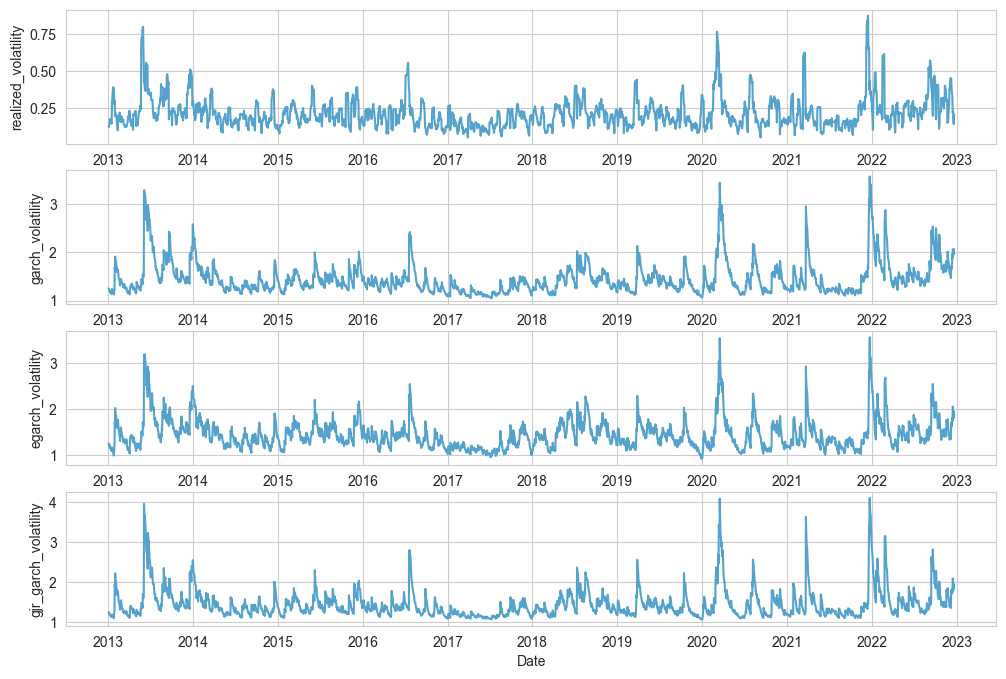

In [6]:
fig, axes = plt.subplots(4, 1, figsize = (12, 8))
sns.lineplot(data = df, x = 'Date', y = 'realized_volatility', ci = None, ax = axes[0])
sns.lineplot(data = df, x = 'Date', y = 'garch_volatility', ci = None, ax = axes[1])
sns.lineplot(data = df, x = 'Date', y = 'egarch_volatility', ci = None, ax = axes[2])
sns.lineplot(data = df, x = 'Date', y = 'gjr_garch_volatility', ci = None, ax = axes[3])
plt.show()